#📌 Extração

In [74]:
import pandas as pd
import numpy as np

In [75]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [76]:
df = pd.read_json(url)

In [77]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [79]:
colunas = ['customer', 'phone', 'internet', 'account']

for coluna in colunas:
    df = pd.json_normalize(df[coluna]).merge(df, left_index=True, right_index=True)
    df = df.drop(columns=[coluna])


In [80]:
df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,PhoneService,MultipleLines,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,Churn
0,One year,Yes,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,...,No,Yes,No,Female,0,Yes,Yes,9,0002-ORFBO,No
1,Month-to-month,No,Mailed check,59.9,542.4,DSL,No,No,No,No,...,Yes,Yes,Yes,Male,0,No,No,9,0003-MKNFE,No
2,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,...,No,Yes,No,Male,0,No,No,4,0004-TLHLJ,Yes
3,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,...,Yes,Yes,No,Male,1,Yes,No,13,0011-IGKFF,Yes
4,Month-to-month,Yes,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,...,No,Yes,No,Female,1,Yes,No,3,0013-EXCHZ,Yes


#🔧 Transformação

In [81]:
df['Charges.Total'] = df['Charges.Total'].apply(lambda x: x.replace(' ', '0').strip())

In [82]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [83]:
df_colunas = list(df.columns)
df_colunas

['Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'MultipleLines',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'customerID',
 'Churn']

In [84]:
for coluna in df_colunas:
  if df[coluna].dtype == 'object':
    df[coluna] = df[coluna].str.lower()

In [85]:
df.columns = df.columns.str.lower().str.replace('.', '_')

In [86]:
df.head()

,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,streamingmovies,phoneservice,multiplelines,gender,seniorcitizen,partner,dependents,tenure,customerid,churn
0,one year,yes,mailed check,65.6,593.30,dsl,no,yes,no,yes,...,no,yes,no,female,0,yes,yes,9,0002-orfbo,no
1,month-to-month,no,mailed check,59.9,542.40,dsl,no,no,no,no,...,yes,yes,yes,male,0,no,no,9,0003-mknfe,no
2,month-to-month,yes,electronic check,73.9,280.85,fiber optic,no,no,yes,no,...,no,yes,no,male,0,no,no,4,0004-tlhlj,yes
3,month-to-month,yes,electronic check,98.0,1237.85,fiber optic,no,yes,yes,no,...,yes,yes,no,male,1,yes,no,13,0011-igkff,yes
4,month-to-month,yes,mailed check,83.9,267.40,fiber optic,no,no,no,yes,...,no,yes,no,female,1,yes,no,3,0013-exchz,yes


In [87]:
df['compras_diarias'] = df['charges_monthly'] / 30

In [88]:
df.head()

,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,phoneservice,multiplelines,gender,seniorcitizen,partner,dependents,tenure,customerid,churn,compras_diarias
0,one year,yes,mailed check,65.6,593.30,dsl,no,yes,no,yes,...,yes,no,female,0,yes,yes,9,0002-orfbo,no,2.186667
1,month-to-month,no,mailed check,59.9,542.40,dsl,no,no,no,no,...,yes,yes,male,0,no,no,9,0003-mknfe,no,1.996667
2,month-to-month,yes,electronic check,73.9,280.85,fiber optic,no,no,yes,no,...,yes,no,male,0,no,no,4,0004-tlhlj,yes,2.463333
3,month-to-month,yes,electronic check,98.0,1237.85,fiber optic,no,yes,yes,no,...,yes,no,male,1,yes,no,13,0011-igkff,yes,3.266667
4,month-to-month,yes,mailed check,83.9,267.40,fiber optic,no,no,no,yes,...,yes,no,female,1,yes,no,3,0013-exchz,yes,2.796667


In [89]:
df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection','techsupport','phoneservice',
    'multiplelines','partner','dependents','churn']] = df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection',
                                                           'techsupport','phoneservice','multiplelines','partner',
                                                           'dependents','churn']].map(lambda x: x.replace('yes', '1').replace('no', '0').strip())

In [90]:
df['multiplelines'] = df['multiplelines'].replace('0 phone service', '0')

In [91]:
df[['techsupport','deviceprotection','onlinebackup','onlinesecurity']] = df[['techsupport','deviceprotection','onlinebackup','onlinesecurity']].map(lambda x: x.replace('0 internet service', '0'))

In [92]:
df['churn'].unique()

array(['0', '1', ''], dtype=object)

In [93]:
#df['churn'] = df['churn'].str.replace('','0',regex=True)

In [94]:
#df['churn'] = df['churn'].str.replace('000','0').replace('010','1')

In [95]:
df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection','techsupport','phoneservice',
    'multiplelines','partner','dependents']] = df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection','techsupport','phoneservice',
    'multiplelines','partner','dependents']].astype(np.int64)

In [96]:
df = df.rename(columns={'contract': 'contrato'})
df = df.rename(columns={'paperlessbilling': 'fatura_on_line'})
df = df.rename(columns={'paymentmethod': 'metodo_pagamento'})
df = df.rename(columns={'charges_monthly': 'gasto_mensal'})
df = df.rename(columns={'charges_total': 'gasto_total'})
df = df.rename(columns={'internetservice': 'servico_internet'})
df = df.rename(columns={'onlinesecurity': 'seguranca_online'})
df = df.rename(columns={'onlinebackup': 'backup_online'})
df = df.rename(columns={'deviceprotection': 'protecao_dispositivo'})
df = df.rename(columns={'techsupport': 'suporte_tecnico'})
df = df.rename(columns={'streamingtv': 'tv_cabo'})
df = df.rename(columns={'streamingmovies': 'streaming_filmes'})
df = df.rename(columns={'phoneservice': 'servico_telefone'})
df = df.rename(columns={'multiplelines': 'multiplas_linhas'})
df = df.rename(columns={'gender': 'genero'})
df = df.rename(columns={'seniorcitizen': 'idoso_maior_65'})
df = df.rename(columns={'partner': 'possui_parceira'})
df = df.rename(columns={'dependents': 'dependentes'})
df = df.rename(columns={'tenure': 'tempo_contrato'})
df = df.rename(columns={'customerid': 'id_cliente'})
df = df.rename(columns={'churn': 'evadido'})

In [97]:
df.head()

,contrato,fatura_on_line,metodo_pagamento,gasto_mensal,gasto_total,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,...,servico_telefone,multiplas_linhas,genero,idoso_maior_65,possui_parceira,dependentes,tempo_contrato,id_cliente,evadido,compras_diarias
0,one year,1,mailed check,65.6,593.30,dsl,0,1,0,1,...,1,0,female,0,1,1,9,0002-orfbo,0,2.186667
1,month-to-month,0,mailed check,59.9,542.40,dsl,0,0,0,0,...,1,1,male,0,0,0,9,0003-mknfe,0,1.996667
2,month-to-month,1,electronic check,73.9,280.85,fiber optic,0,0,1,0,...,1,0,male,0,0,0,4,0004-tlhlj,1,2.463333
3,month-to-month,1,electronic check,98.0,1237.85,fiber optic,0,1,1,0,...,1,0,male,1,1,0,13,0011-igkff,1,3.266667
4,month-to-month,1,mailed check,83.9,267.40,fiber optic,0,0,0,1,...,1,0,female,1,1,0,3,0013-exchz,1,2.796667


#📊 Carga e análise

In [98]:
df_cli_evadidos = df.query('evadido=="1"')
df_cli_nao_evadidos = df.query('evadido=="0"')
df_cli_desconhecidos = df.query('evadido==""')

In [99]:
df_cli_evadidos['contrato'].value_counts()

,count
contrato,
month-to-month,1655
one year,166
two year,48


In [100]:
df_cli_nao_evadidos['contrato'].value_counts()

,count
contrato,
month-to-month,2220
two year,1647
one year,1307


## Análise da distribuição de evadidos

Verificando a proporção de clientes que evadiram para entender o equilíbrio do dataset.


In [101]:
churn_counts = df['evadido'].value_counts()
churn_proportions = df['evadido'].value_counts(normalize=True)

print("Contagem de evadidos:")
print(churn_counts)
print("\nProporção de evadidos:")
print(churn_proportions)

Contagem de evadidos:
evadido
0    5174
1    1869
      224
Name: count, dtype: int64

Proporção de evadidos:
evadido
0    0.711986
1    0.257190
     0.030824
Name: proportion, dtype: float64


##Análise de variáveis categóricas e evadidos
Explorar a relação entre as variáveis categóricas (como tipo de contrato, serviço de internet, método de pagamento, etc.) e evadidos, usando contagens e visualizações.


In [102]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'id_cliente' and df[col].nunique() < 50]

for col in categorical_cols:
    print(f"\nAnalizando coluna: {col}")
    churn_counts = df_cli_evadidos[col].value_counts()
    non_churn_counts = df_cli_nao_evadidos[col].value_counts()
    print(f"Clientes evadidos:\n{churn_counts}")
    print(f"Clientes não evadidos:\n{non_churn_counts}")


Analizando coluna: contrato
Clientes evadidos:
contrato
month-to-month    1655
one year           166
two year            48
Name: count, dtype: int64
Clientes não evadidos:
contrato
month-to-month    2220
two year          1647
one year          1307
Name: count, dtype: int64

Analizando coluna: metodo_pagamento
Clientes evadidos:
metodo_pagamento
electronic check             1071
mailed check                  308
bank transfer (automatic)     258
credit card (automatic)       232
Name: count, dtype: int64
Clientes não evadidos:
metodo_pagamento
mailed check                 1304
electronic check             1294
credit card (automatic)      1290
bank transfer (automatic)    1286
Name: count, dtype: int64

Analizando coluna: servico_internet
Clientes evadidos:
servico_internet
fiber optic    1297
dsl             459
no              113
Name: count, dtype: int64
Clientes não evadidos:
servico_internet
dsl            1962
fiber optic    1799
no             1413
Name: count, dtype: int64

Identificando colunas categóricas, verificando seus tipos de dados e o número de valores exclusivos e, em seguida, iterando por essas colunas para calcular e exibir contagens de valores para clientes evadidos e não evadidos.

Cálculo da proporção de rotatividade dentro de cada categoria para as colunas categóricas identificadas para entender a relação entre essas variáveis e a rotatividade(churn).

In [103]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'id_cliente' and col != 'evadido' and df[col].nunique() < 50]

for col in categorical_cols:
    print(f"\nProporção de evadido por {col}:")
    churn_proportion = df.groupby(col)['evadido'].value_counts(normalize=True).unstack().fillna(0)
    if '1' in churn_proportion.columns and ('0' in churn_proportion.columns or '' in churn_proportion.columns):
        churn_proportion['evadido_rate'] = churn_proportion['1']
        print(churn_proportion[['evadido_rate']].sort_values(by='evadido_rate', ascending=False))
    else:
        print("Dados de rotatividade (evadido) insuficientes para calcular a proporção.")


Proporção de evadido por contrato:
evadido         evadido_rate
contrato                    
month-to-month      0.413233
one year            0.109282
two year            0.027539

Proporção de evadido por metodo_pagamento:
evadido                    evadido_rate
metodo_pagamento                       
electronic check               0.438037
mailed check                   0.184985
bank transfer (automatic)      0.162366
credit card (automatic)        0.147959

Proporção de evadido por servico_internet:
evadido           evadido_rate
servico_internet              
fiber optic           0.405566
dsl                   0.184486
no                    0.071474

Proporção de evadido por tv_cabo:
evadido              evadido_rate
tv_cabo                          
no                       0.325276
yes                      0.291756
no internet service      0.071474

Proporção de evadido por streaming_filmes:
evadido              evadido_rate
streaming_filmes                 
no                 

Visualizar a relação entre variáveis categóricas e a rotatividade usando gráficos de barras para tornar os padrões e as diferenças nas taxas de rotatividade entre as categorias mais interpretáveis, percorrendo as colunas categóricas identificadas e criando um gráfico de barras para cada uma, mostrando a taxa de rotatividade por categoria.



## Análise de variáveis numéricas e evadido (churn)

Investigar a relação entre as variáveis numéricas (como `gasto_mensal`, `gasto_total`, `tempo_contrato`, `compras_diarias`) e evadido, usando estatísticas descritivas e visualizações (como box plots e histogramas).



Analizando coluna: gasto_mensal
Estatísticas descritivas para clientes evadidos:


,gasto_mensal
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000



Estatísticas descritivas para clientes não evadidos:


,gasto_mensal
count,5174.000000
mean,61.265124
std,31.092648
min,18.250000
25%,25.100000
50%,64.425000
75%,88.400000
max,118.750000



Analizando coluna: gasto_total
Estatísticas descritivas para clientes evadidos:


,gasto_total
count,1869.000000
mean,1531.796094
std,1890.822994
min,18.850000
25%,134.500000
50%,703.550000
75%,2331.300000
max,8684.800000



Estatísticas descritivas para clientes não evadidos:


,gasto_total
count,5174.000000
mean,2549.911442
std,2329.954215
min,0.000000
25%,572.900000
50%,1679.525000
75%,4262.850000
max,8672.450000



Analizando coluna: tempo_contrato
Estatísticas descritivas para clientes evadidos:


,tempo_contrato
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000



Estatísticas descritivas para clientes não evadidos:


,tempo_contrato
count,5174.000000
mean,37.569965
std,24.113777
min,0.000000
25%,15.000000
50%,38.000000
75%,61.000000
max,72.000000



Analizando coluna: compras_diarias
Estatísticas descritivas para clientes evadidos:


,compras_diarias
count,1869.000000
mean,2.481378
std,0.822202
min,0.628333
25%,1.871667
50%,2.655000
75%,3.140000
max,3.945000



Estatísticas descritivas para clientes não evadidos:


,compras_diarias
count,5174.000000
mean,2.042171
std,1.036422
min,0.608333
25%,0.836667
50%,2.147500
75%,2.946667
max,3.958333


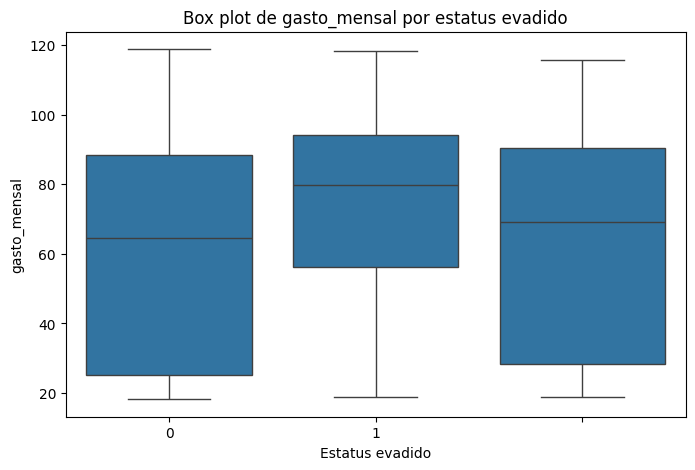

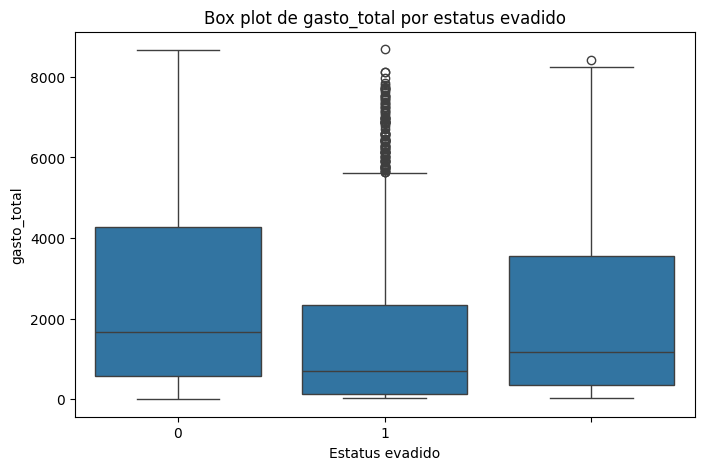

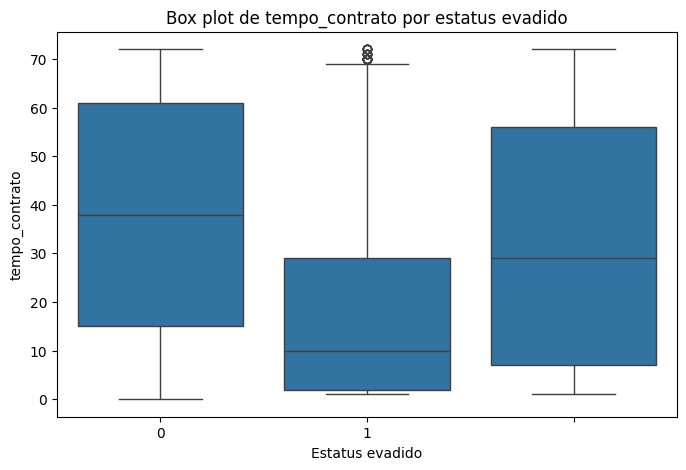

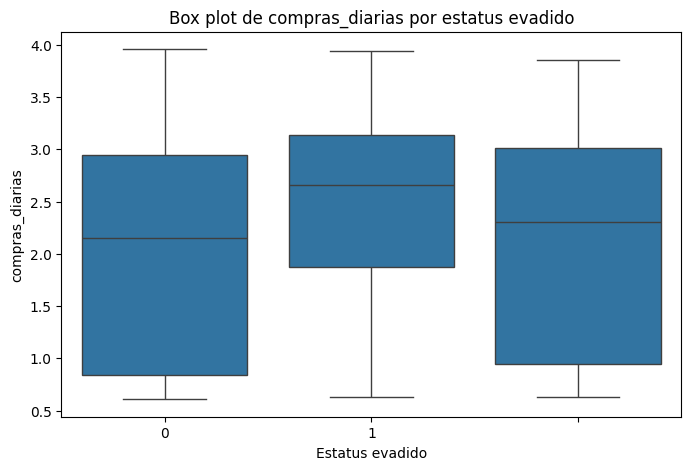

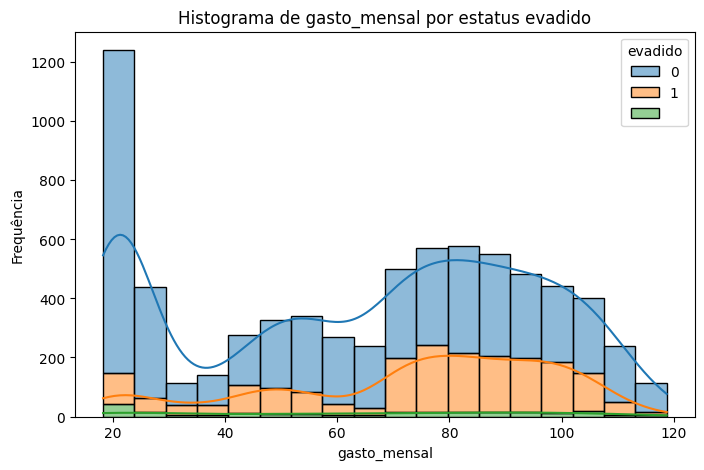

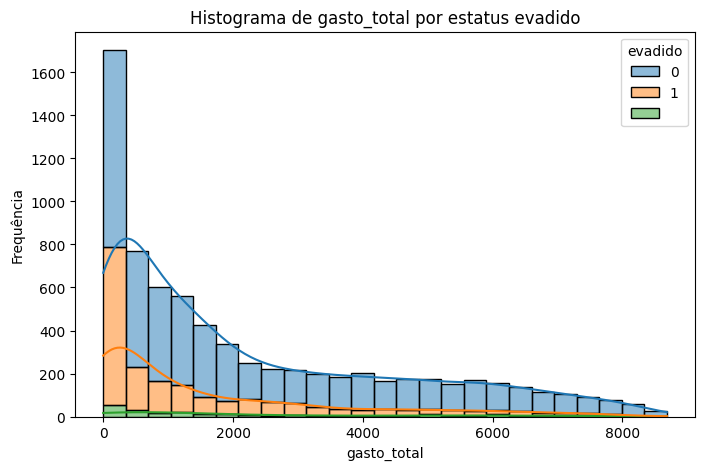

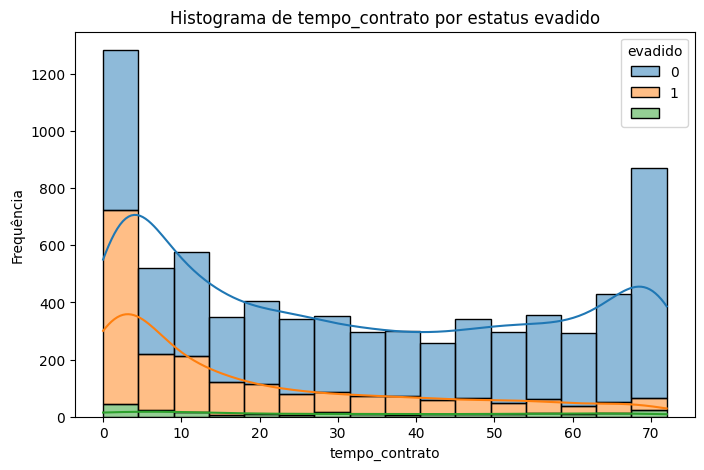

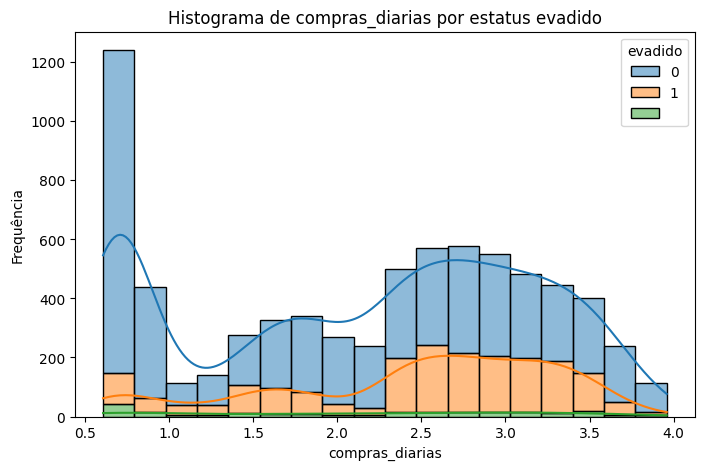

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['gasto_mensal', 'gasto_total', 'tempo_contrato', 'compras_diarias']

for col in numerical_cols:
    print(f"\nAnalizando coluna: {col}")
    print("Estatísticas descritivas para clientes evadidos:")
    display(df_cli_evadidos[col].describe())
    print("\nEstatísticas descritivas para clientes não evadidos:")
    display(df_cli_nao_evadidos[col].describe())

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='evadido', y=col, data=df)
    plt.title(f'Box plot de {col} por estatus evadido')
    plt.xlabel('Estatus evadido')
    plt.ylabel(col)
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='evadido', kde=True, multiple="stack")
    plt.title(f'Histograma de {col} por estatus evadido')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

## Análise de correlação

Calculando a correlação entre as variáveis numéricas e evadidos (após converter 'evadido' para numérico) para identificar relacionamentos lineares.


Criando uma cópia do DataFrame, convertendo a coluna 'evadido' em numérica, selecionando as colunas numéricas e calculando a matriz de correlação.



In [105]:
df_copy = df.copy()
df_copy['evadido_numerico'] = df_copy['evadido'].replace({'0': 0, '1': 1, '': 2}).astype(int)
numerical_colms = df_copy.select_dtypes(include=np.number).columns
correlation_matrix = df_copy[numerical_colms].corr()
display(correlation_matrix)

/tmp/ipython-input-105-1713143426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['evadido_numerico'] = df_copy['evadido'].replace({'0': 0, '1': 1, '': 2}).astype(int)


,fatura_on_line,gasto_mensal,gasto_total,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,servico_telefone,multiplas_linhas,idoso_maior_65,possui_parceira,dependentes,tempo_contrato,compras_diarias,evadido_numerico
fatura_on_line,1.000000,0.353714,0.160023,-0.001693,0.131187,0.105211,0.037581,0.013624,0.163225,0.157734,-0.011201,-0.111752,0.007949,0.353714,0.162062
gasto_mensal,0.353714,1.000000,0.652211,0.298307,0.442974,0.483590,0.338429,0.246709,0.490699,0.220388,0.097122,-0.115832,0.247982,1.000000,0.152092
gasto_total,0.160023,0.652211,1.000000,0.412764,0.512027,0.523836,0.431032,0.113985,0.468405,0.104076,0.315409,0.061474,0.825407,0.652211,-0.164170
seguranca_online,-0.001693,0.298307,0.412764,1.000000,0.286432,0.275699,0.356113,-0.093341,0.098396,-0.037953,0.141392,0.083951,0.327252,0.298307,-0.143919
backup_online,0.131187,0.442974,0.512027,0.286432,1.000000,0.306665,0.292422,-0.052165,0.205156,0.068824,0.139523,0.023686,0.361291,0.442974,-0.068750
protecao_dispositivo,0.105211,0.483590,0.523836,0.275699,0.306665,1.000000,0.332267,-0.073033,0.202172,0.060358,0.153209,0.014797,0.361792,0.483590,-0.061069
suporte_tecnico,0.037581,0.338429,0.431032,0.356113,0.292422,0.332267,1.000000,-0.097573,0.098053,-0.059376,0.116228,0.062586,0.322139,0.338429,-0.138382
servico_telefone,0.013624,0.246709,0.113985,-0.093341,-0.052165,-0.073033,-0.097573,1.000000,0.280379,0.010060,0.018828,-0.003863,0.010205,0.246709,0.004765
multiplas_linhas,0.163225,0.490699,0.468405,0.098396,0.205156,0.202172,0.098053,0.280379,1.000000,0.144567,0.141187,-0.027894,0.331678,0.490699,0.032063
idoso_maior_65,0.157734,0.220388,0.104076,-0.037953,0.068824,0.060358,-0.059376,0.010060,0.144567,1.000000,0.022970,-0.212952,0.018187,0.220388,0.126493


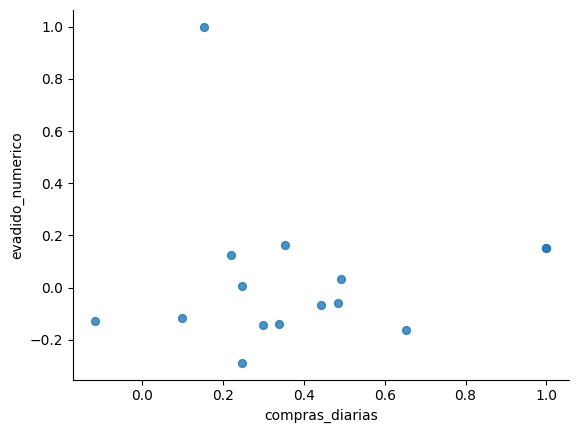

In [106]:
# @title compras diárias vs evadidos

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='compras_diarias', y='evadido_numerico', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#📄Relatório Final

##Introdução

Este é o projeto "Churn de Clientes" da empresa <b>Telecom X</b>. O objetivo aqui é entender o porquê da empresa enfrentar um alto índice de cancelamentos de clientes através da análise de dados de seus clientes.

##Limpeza e tratamento de dados:


1.   Após a importação da biblioteca Pandas foi feito a importação do arquivo .json através da url: 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
2.   Feito a normalização com o comando *'json_normalize'*, o problema aqui foi que os dados estavam agrupados em forma de dicionário, impossibilitando utilizar o comando *'explode'* para desagrupar todas as colunas de uma só vez, então foi preciso criar uma função para executar essa tarefa.
3. Utilizado o gasto mensal por cliente para criar uma coluna de compras diárias e proporcionar uma visão mais detalhada do comportamento dos clientes ao longo do tempo.
4. Verificado e corrigido algumas inconsistências de dados como ' , ' separando casas decimais em colunas que precisariam ser numéricas, espaços em branco, valores duplicados.
5. Colunas numéricas estilo moeda foram transformadas para o tipo *'float64'*
6. Colunas que continham dados como *'yes, no, 1 e 2'*, foram transformadas para o tipo *'int64'* para padronizaar, facilitar o processamento matemático e a aplicação de modelos analíticos.
7. As colunas foram renomeadas para a Lingua Portuguesa com o intuito de dar mais clareza na leitura dos dados com o minimo de mix de linguas.



##Análise Exploratória de Dados:

1. Verificado a proporção de clientes que evadiram para entender o equilíbrio do dataset.
2. Explorado a relação entre as variáveis categóricas (como tipo de contrato, serviço de internet, método de pagamento, etc.) e evadidos, usando contagens e visualizações.
3. Identificado colunas categóricas, verificando seus tipos de dados e o número de valores exclusivos e, em seguida, iterando por essas colunas para calcular e exibir contagens de valores para clientes evadidos e não evadidos.
4. Cálculo da proporção de rotatividade dentro de cada categoria para as colunas categóricas identificadas para entender a relação entre essas variáveis e a rotatividade(churn).
5. Relação entre variáveis categóricas e a rotatividade, usando gráficos de barras para tornar os padrões e as diferenças nas taxas de rotatividade entre as categorias mais interpretáveis.


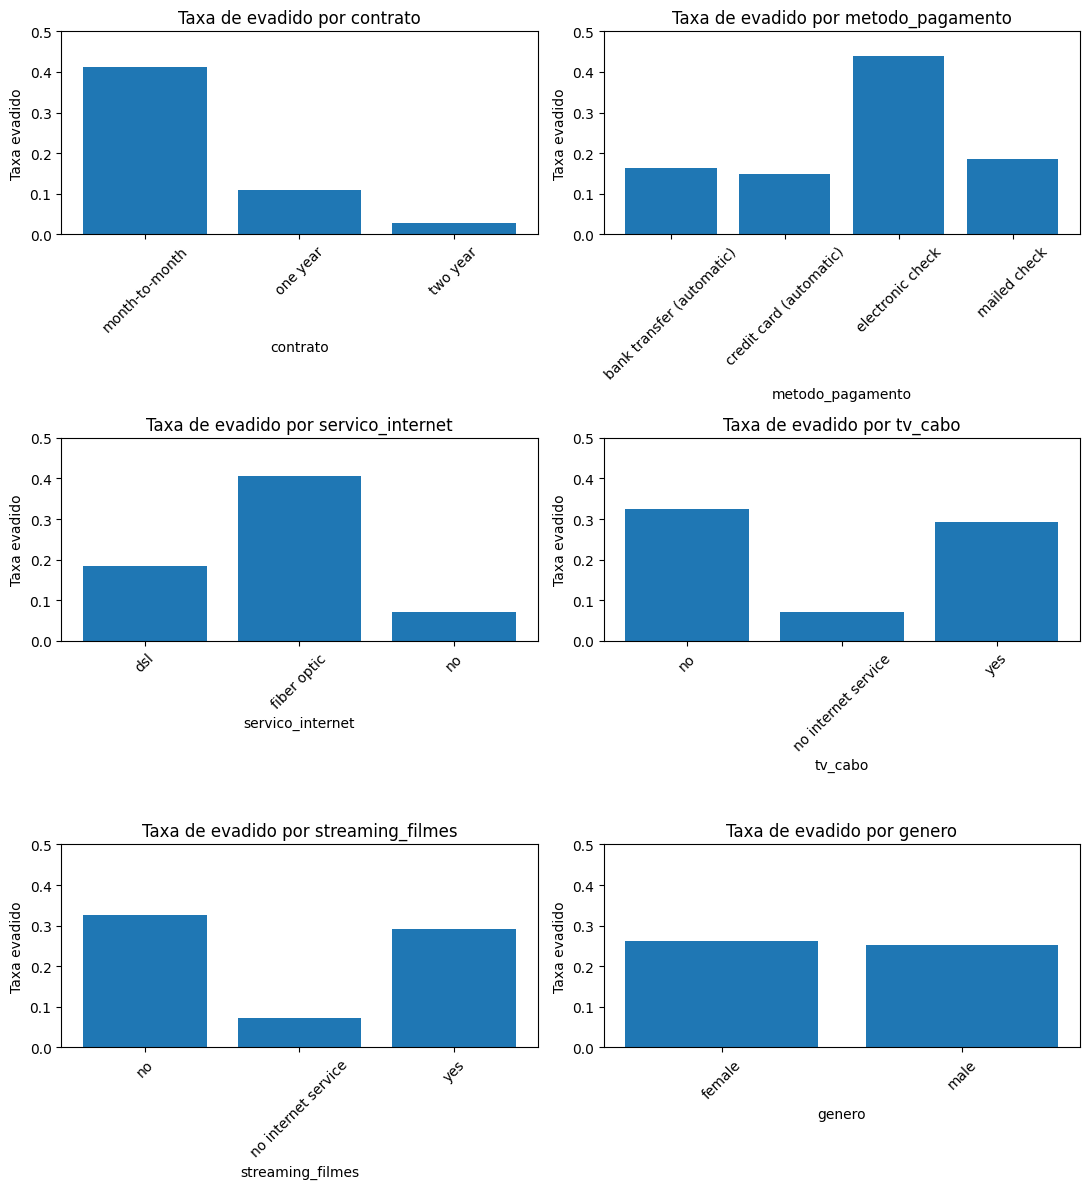

In [108]:
#@title .
import matplotlib.pyplot as plt
import seaborn as sns
colum = 1

fig, axs = plt.subplots(3,2, figsize=(11,12))
for col in categorical_cols:
    lin = categorical_cols.index(col)

    churn_proportion = df.groupby(col)['evadido'].value_counts(normalize=True).unstack().fillna(0)
    if '1' in churn_proportion.columns and ('0' in churn_proportion.columns or '' in churn_proportion.columns):
        churn_proportion['churn_rate'] = churn_proportion['1']
        #sns.barplot(x=churn_proportion.index, y='churn_rate', data=churn_proportion.sort_values(by='churn_rate', ascending=False))

        if(np.mod(colum,2) != 0):
          if(colum > 0) : lin = colum - (lin // 2) - 1
          axs[lin,0].bar(churn_proportion.index, churn_proportion['churn_rate'])
          axs[lin,0].set_title(f'Taxa de evadido por {col}')
          axs[lin,0].set_xlabel(col)
          axs[lin,0].set_ylabel('Taxa evadido')
          axs[lin,0].tick_params(axis='x', rotation=45) # Use tick_params to rotate labels
        else:
          lin = colum // 2
          axs[lin-1,1].bar(churn_proportion.index, churn_proportion['churn_rate'])
          axs[lin-1,1].set_title(f'Taxa de evadido por {col}')
          axs[lin-1,1].set_xlabel(col)
          axs[lin-1,1].set_ylabel('Taxa evadido')
          axs[lin-1,1].tick_params(axis='x', rotation=45) # Use tick_params to rotate labels
        colum += 1
ymin = 0.0
ymax = 0.5

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

fig.tight_layout()
plt.show()

6. Análise de variáveis numéricas e evadido:
- Investigando a relação entre as variáveis numéricas (como gasto_mensal, gasto_total, tempo_contrato, compras_diarias) e evadido, usando estatísticas descritivas e visualizações (como box plots e histogramas).

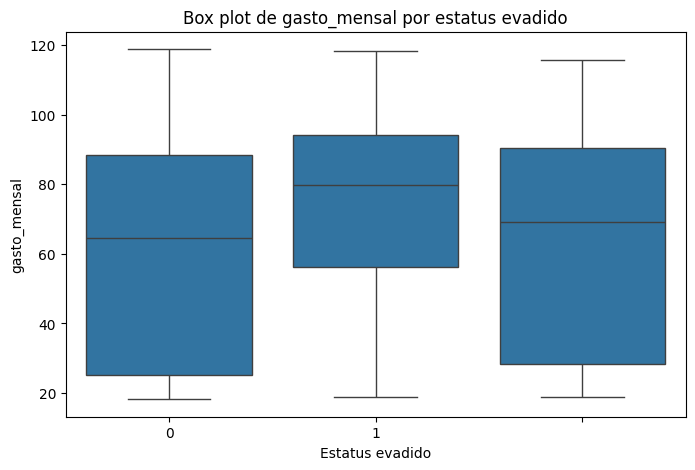

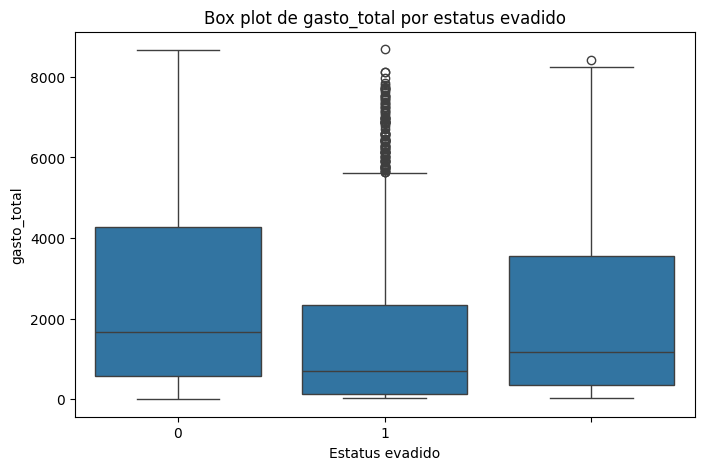

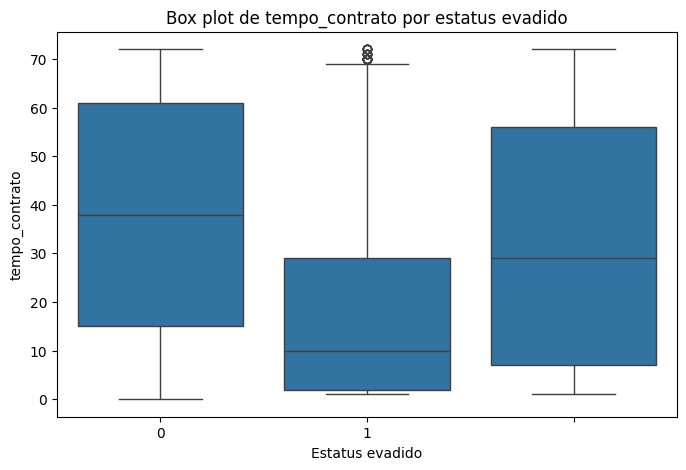

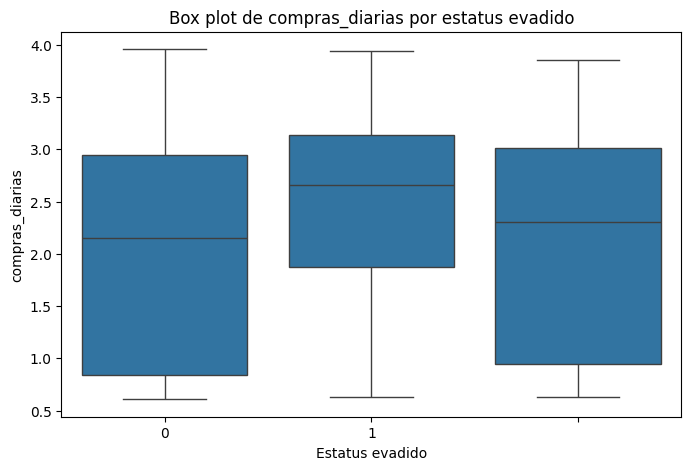

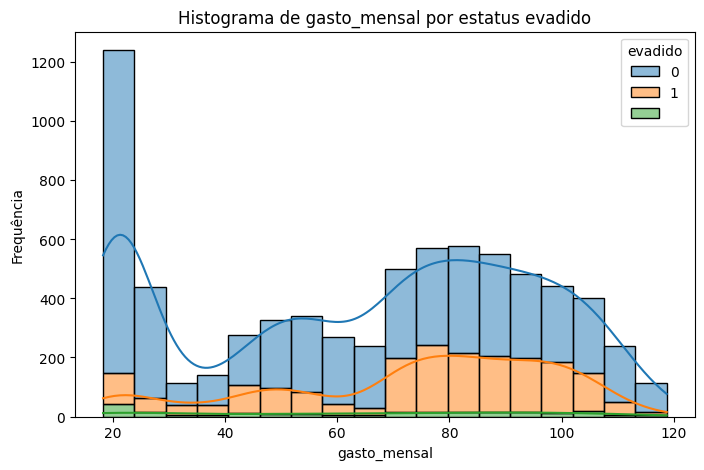

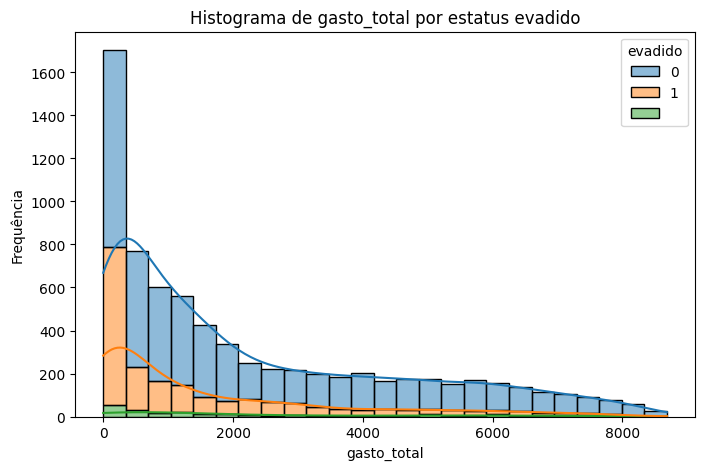

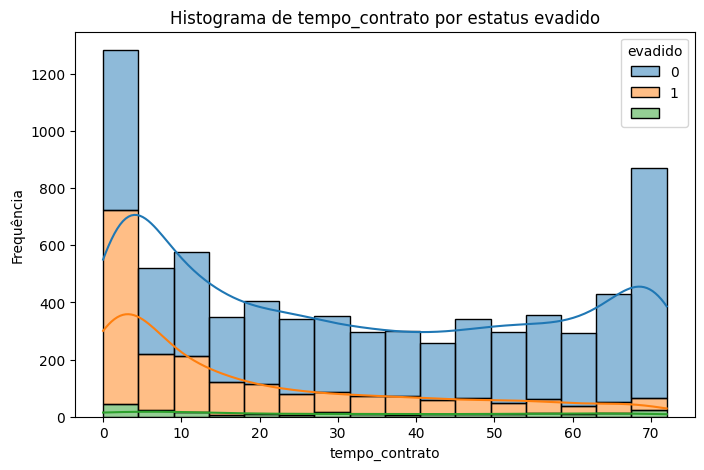

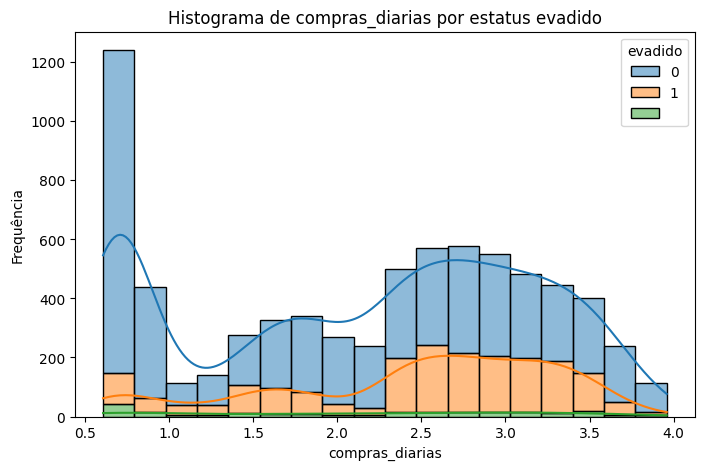

In [109]:
#@title .
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='evadido', y=col, data=df)
    plt.title(f'Box plot de {col} por estatus evadido')
    plt.xlabel('Estatus evadido')
    plt.ylabel(col)
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='evadido', kde=True, multiple="stack")
    plt.title(f'Histograma de {col} por estatus evadido')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

7. Análise de correlação:
- Calculado a correlação entre as variáveis numéricas e evadidos (após converter 'evadido' para numérico) para identificar relacionamentos lineares.

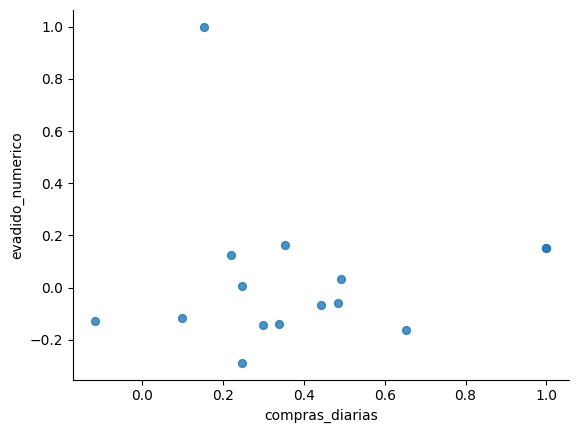

In [111]:
# @title 8. Compras diárias vs evadidos

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='compras_diarias', y='evadido_numerico', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Análise multivariada

Explorar outras combinações de variáveis que podem influenciar a evasão de clientes (por exemplo, clientes com contrato mensal e serviço de internet fibra óptica).


Explorando combinações de variáveis categóricas e calculando a taxa de rotatividade de cada combinação. Em seguida é gerada visualização dos resultados usando mapas de calor.




Analizando a combinação entre contrato e servico_internet
Taxa de evadido:


servico_internet,dsl,fiber optic,no
contrato,,,
month-to-month,0.312450,0.528422,0.181651
one year,0.090444,0.185714,0.024129
two year,0.018721,0.070615,0.007541


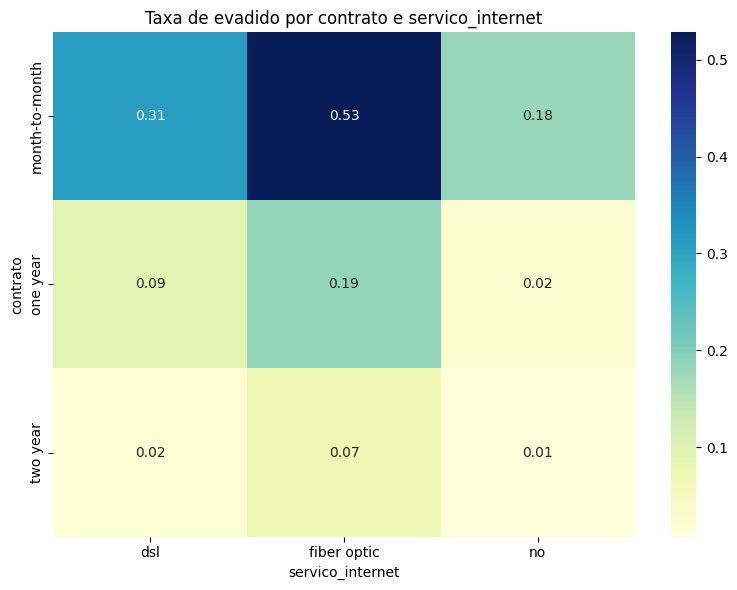


Analizando a combinação entre metodo_pagamento e contrato
Taxa de evadido:


contrato,month-to-month,one year,two year
metodo_pagamento,,,
bank transfer (automatic),0.330592,0.094763,0.032759
credit card (automatic),0.319569,0.099274,0.021739
electronic check,0.519060,0.178273,0.076023
mailed check,0.304865,0.066474,0.007614


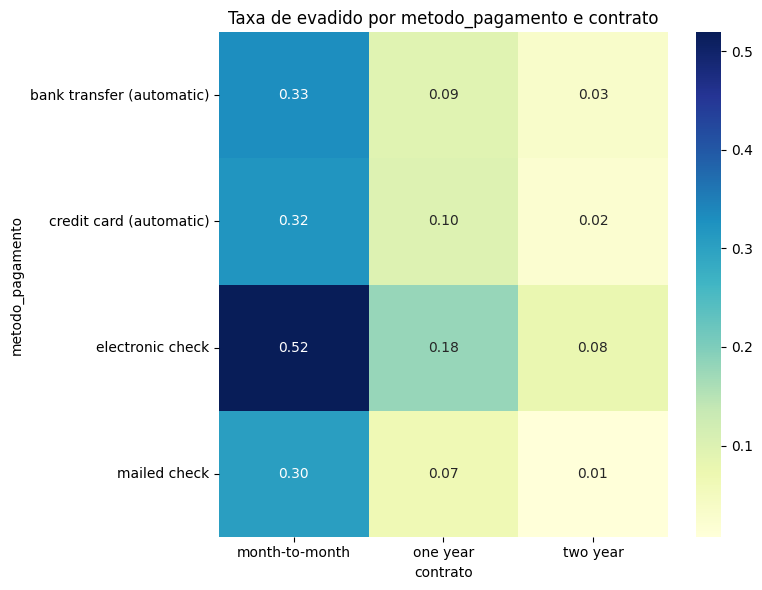


Analizando a combinação entre contrato e seguranca_online
Taxa de evadido:


seguranca_online,0,1
contrato,,
month-to-month,0.442331,0.285906
one year,0.111462,0.105634
two year,0.026585,0.028758


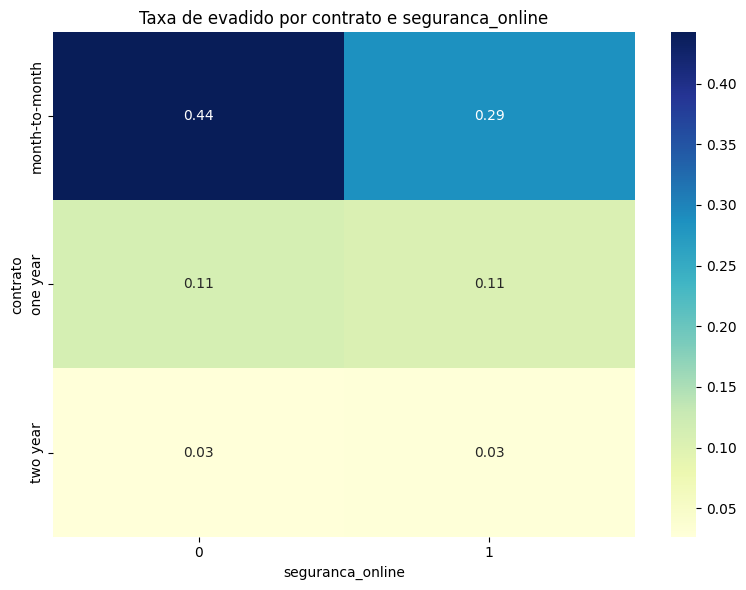

In [113]:
#@title .
categorical_cols = [col for col in df.columns
                    if df[col].dtype == 'object' and
                    col != 'id_cliente' and col != 'evadido' and df[col].nunique() < 10]

combinations_to_explore = [
    ('contrato', 'servico_internet'),
    ('metodo_pagamento', 'contrato'),
    ('contrato', 'seguranca_online')
]

for col1, col2 in combinations_to_explore:
    print(f"\nAnalizando a combinação entre {col1} e {col2}")
    churn_proportion = df.groupby([col1, col2])['evadido'].value_counts(normalize=True).unstack().fillna(0)
    if '1' in churn_proportion.columns:
        churn_rate = churn_proportion['1'].unstack().fillna(0)
        print("Taxa de evadido:")
        display(churn_rate)

        plt.figure(figsize=(8, 6))
        sns.heatmap(churn_rate, annot=True, cmap='YlGnBu', fmt=".2f")
        plt.title(f'Taxa de evadido por {col1} e {col2}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.tight_layout()
        plt.show()
    else:
        print("Dados de rotatividade insuficientes para calcular a proporção.")

## Resumo das causas potenciais

Compilado das principais observações e os fatores que parecem estar mais relacionados à evasão de clientes com base na análise.


In [117]:
# @title .
print("Relatório de Análise de Evasão de Clientes (Churn)\n")
print("Principais Observações e Fatores Relacionados à Evasão:\n")

print("1. Distribuição de evadidos:")
print(f"- A proporção de clientes que evadiram ('1') é de aproximadamente {churn_proportions['1']:.2f}%.")
print(f"- A proporção de clientes que não evadiram ('0') é de aproximadamente {churn_proportions['0']:.2f}%.")
print(f"- Existem {churn_proportions['']:.2f}% de valores desconhecidos ('') na coluna evadido.")

print("\n2. Variáveis categóricas:")
print("- Tipo de Contrato: Clientes com contrato 'month-to-month' apresentam taxas de evasão significativamente mais altas.")
print("- Serviço de Internet: Clientes com serviço 'fiber optic' tendem a ter maior evasão em comparação com 'dsl' ou sem serviço de internet.")
print("- Método de Pagamento: 'Electronic check' é o método de pagamento associado à maior taxa de evasão.")
print("- Serviços Adicionais (Segurança Online, Backup Online, Proteção dispositivo, Suporte Tecnico): A ausência desses serviços está associada \n  a maiores taxas de evasão.")
print("- Fatura online: Clientes com 'fatura_online' tendem a ter uma taxa de evasão ligeiramente maior.")

print("\n3. Variáveis numéricas:")
print("- Gasto Mensal: Clientes que evadem geralmente têm 'gasto_mensal' mais altos.")
print("- Tempo de contrato: Clientes com menor tempo de contrato ('tenure') têm maior probabilidade de evasão.")
print("- Gasto Total: Clientes com 'gasto_total' mais baixos (que se relaciona com menor tempo de contrato) também tendem a evadir mais.")

print("\n4. Análise Multivariada:")
print("- A combinação de contrato 'month-to-month' e serviço de internet 'fiber optic' resulta em uma alta taxa de evasão.")
print("- Clientes com contrato 'month-to-month' utilizando 'electronic check' como metodo de pagamento também exibem alta evasão.")
print("- A ausência de segurança online para clientes com contrato 'month-to-month' está associada a uma evasão elevada.")

print("\nResumo dos Fatores Chave de Evasão:")
print("- Contratos de curto prazo ('month-to-month').")
print("- Serviços de internet de alta velocidade ('fiber optic').")
print("- Utilização de métodos de pagamento 'electronic check'.")
print("- Falta de serviços de segurança online e suporte técnico.")
print("- Baixo tempo de relacionamento com a empresa ('tempo_contrato').")
print("- Altos gastos mensais ('gasto_mensal').")

Relatório de Análise de Evasão de Clientes (Churn)

Principais Observações e Fatores Relacionados à Evasão:

1. Distribuição de evadidos:
- A proporção de clientes que evadiram ('1') é de aproximadamente 0.26%.
- A proporção de clientes que não evadiram ('0') é de aproximadamente 0.71%.
- Existem 0.03% de valores desconhecidos ('') na coluna evadido.

2. Variáveis categóricas:
- Tipo de Contrato: Clientes com contrato 'month-to-month' apresentam taxas de evasão significativamente mais altas.
- Serviço de Internet: Clientes com serviço 'fiber optic' tendem a ter maior evasão em comparação com 'dsl' ou sem serviço de internet.
- Método de Pagamento: 'Electronic check' é o método de pagamento associado à maior taxa de evasão.
- Serviços Adicionais (Segurança Online, Backup Online, Proteção dispositivo, Suporte Tecnico): A ausência desses serviços está associada 
  a maiores taxas de evasão.
- Fatura online: Clientes com 'fatura_online' tendem a ter uma taxa de evasão ligeiramente maior.



## Resumo:

### Principais conclusões da análise de dados

* Aproximadamente 26% dos clientes no conjunto de dados apresentaram rotatividade.
* Clientes com contratos mensais apresentam taxas de rotatividade significativamente maiores.
* Clientes com serviço de internet por fibra óptica têm maior probabilidade de rotatividade.
* Cheque eletrônico é o método de pagamento mais fortemente associado à rotatividade.
* A ausência de serviços como segurança online, backup online, proteção de dispositivos e suporte técnico está associada a taxas de rotatividade mais altas.
* Clientes com mensalidades mais altas tendem a rotatividade com mais frequência.
* Clientes com menor tempo de serviço têm maior probabilidade de rotatividade.
* A combinação de contratos mensais e serviço de internet por fibra óptica resulta em uma taxa de rotatividade particularmente alta.
* Clientes com contratos mensais que utilizam cheque eletrônico também apresentam alta rotatividade.
* A falta de segurança online para clientes com contratos mensais está fortemente associada à alta rotatividade.

### Insights ou Próximos Passos

* Concentre os esforços de retenção em clientes com contratos mensais, especialmente aqueles com internet de fibra óptica e que utilizam cheques eletrônicos.
* Promova a adoção de serviços adicionais, como segurança online e suporte técnico, principalmente para novos clientes ou aqueles com contratos de curto prazo.